# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [46]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [48]:
# !gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
# !gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
# !gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [49]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [50]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [51]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
324,29,98.60,2933.2,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1
2706,62,104.30,6613.65,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,0
1999,8,19.85,146.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
1768,27,20.10,562.6,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),0
5122,68,75.80,5293.95,Male,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),1
1945,28,29.75,790.7,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,0
2063,42,84.30,3588.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,1
3554,59,96.65,5580.8,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
1076,47,100.05,4871.05,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4890,3,91.85,257.05,Male,0,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,1


In [52]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [53]:
data.replace(' ', np.nan, inplace = True)


In [54]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [55]:

data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].mode())
data['TotalSpent'] = data['TotalSpent'].astype('float64')

In [56]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

<AxesSubplot: xlabel='MonthlySpending', ylabel='Count'>

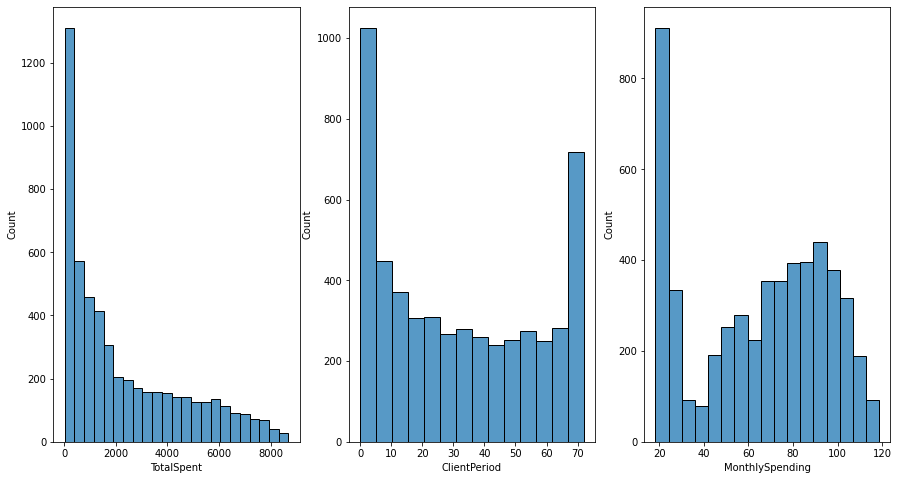

In [57]:
fig, axs = plt.subplots(ncols=3, figsize = (15,8))
sns.histplot(data=data, x = 'TotalSpent', ax=axs[0])
sns.histplot(data=data, x = 'ClientPeriod', ax=axs[1])
sns.histplot(data=data, x = 'MonthlySpending', ax=axs[2])

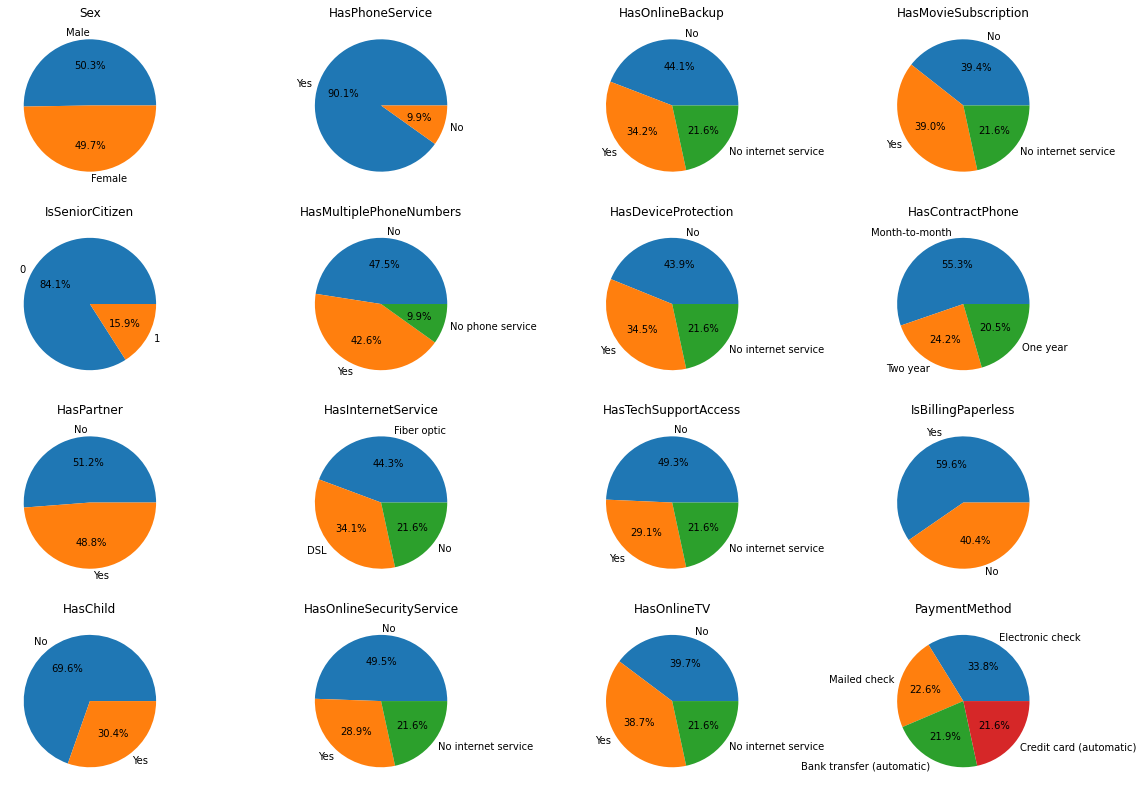

In [58]:
fig, axs = plt.subplots(4, 4, figsize = (20,14))
n = 0
m = 0
for col in cat_cols:
    axs[n,m].set_title(col)
    axs[n,m].pie(data[col].value_counts(), labels = data[col].value_counts().index, autopct='%1.1f%%')
    n += 1
    if n == 4:
        n = 0
        m += 1

([<matplotlib.patches.Wedge at 0x176e08de130>,
 [Text(-0.7478930722742168, 0.8066324766857788, '0'),
  Text(0.7478930722742166, -0.8066324766857789, '1')],
 [Text(-0.4079416757859364, 0.4399813509195156, '73.8%'),
  Text(0.4079416757859363, -0.4399813509195157, '26.2%')])

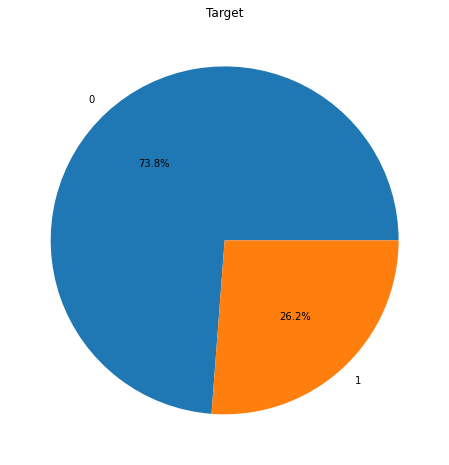

In [59]:
plt.figure(figsize = (10, 8))
plt.title('Target')
plt.pie(data['Churn'].value_counts(), labels = data['Churn'].value_counts().index, autopct='%1.1f%%')

Из приведённых выше диаграмм видно, что распределение целевой переменной несбалансированно, поэтому применение такой метрики как AUC-ROC вполне обоснованно.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [60]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [61]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score


In [62]:
y = data['Churn']
X = data.drop('Churn', axis = 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [64]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('logistic', LogisticRegression())
])

param_grid = {
    "logistic__C": np.logspace(-4, 4, 20)
}

searcher = GridSearchCV(pipeline, param_grid,
                        scoring="roc_auc", cv=5, n_jobs=2)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_['logistic__C']

C:\Users\rokot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rokot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rokot\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rokot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\ro

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [28]:
best_alpha 

1.0526315789473684

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('model', LogisticRegression(C = best_alpha))
])


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("AUC-ROC = %.4f" % roc_auc_score(y_test, y_pred))

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество значения гиперпараметра С приведено выше (переменная best_alpha = 1.62), AUC-ROC = 0.74, при попытке вручную подставить другие значения метрика качества не улучшалась    

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [48]:
from catboost import CatBoostClassifier, Pool

boost_model = CatBoostClassifier(n_estimators=200, cat_features=cat_cols)
boost_model.fit(X_train, y_train)
y_train_pred = boost_model.predict_proba(X_train)[:, 1]
y_test_pred = boost_model.predict_proba(X_test)[:, 1]
print("Auc-ROC = %.4f" % roc_auc_score(y_test, y_test_pred))

Learning rate set to 0.081125
0:	learn: 0.6492047	total: 171ms	remaining: 34s
1:	learn: 0.6053036	total: 189ms	remaining: 18.7s
2:	learn: 0.5715086	total: 208ms	remaining: 13.7s
3:	learn: 0.5512797	total: 218ms	remaining: 10.7s
4:	learn: 0.5302610	total: 235ms	remaining: 9.15s
5:	learn: 0.5121817	total: 246ms	remaining: 7.95s
6:	learn: 0.4970361	total: 263ms	remaining: 7.26s
7:	learn: 0.4861136	total: 272ms	remaining: 6.52s
8:	learn: 0.4749020	total: 288ms	remaining: 6.11s
9:	learn: 0.4661102	total: 304ms	remaining: 5.78s
10:	learn: 0.4574959	total: 322ms	remaining: 5.53s
11:	learn: 0.4505367	total: 339ms	remaining: 5.31s
12:	learn: 0.4429832	total: 356ms	remaining: 5.12s
13:	learn: 0.4392348	total: 375ms	remaining: 4.99s
14:	learn: 0.4348710	total: 391ms	remaining: 4.82s
15:	learn: 0.4304145	total: 407ms	remaining: 4.67s
16:	learn: 0.4279410	total: 418ms	remaining: 4.5s
17:	learn: 0.4249151	total: 436ms	remaining: 4.41s
18:	learn: 0.4225928	total: 452ms	remaining: 4.3s
19:	learn: 0.41

165:	learn: 0.3468681	total: 2.92s	remaining: 597ms
166:	learn: 0.3466122	total: 2.93s	remaining: 580ms
167:	learn: 0.3462899	total: 2.95s	remaining: 562ms
168:	learn: 0.3457617	total: 2.96s	remaining: 544ms
169:	learn: 0.3454415	total: 2.98s	remaining: 526ms
170:	learn: 0.3450018	total: 3s	remaining: 508ms
171:	learn: 0.3448793	total: 3.01s	remaining: 491ms
172:	learn: 0.3446133	total: 3.03s	remaining: 473ms
173:	learn: 0.3443225	total: 3.05s	remaining: 455ms
174:	learn: 0.3436590	total: 3.06s	remaining: 437ms
175:	learn: 0.3432497	total: 3.08s	remaining: 420ms
176:	learn: 0.3429484	total: 3.09s	remaining: 402ms
177:	learn: 0.3426861	total: 3.11s	remaining: 384ms
178:	learn: 0.3422556	total: 3.13s	remaining: 367ms
179:	learn: 0.3420479	total: 3.15s	remaining: 350ms
180:	learn: 0.3415846	total: 3.16s	remaining: 332ms
181:	learn: 0.3410637	total: 3.18s	remaining: 314ms
182:	learn: 0.3407993	total: 3.19s	remaining: 297ms
183:	learn: 0.3405729	total: 3.21s	remaining: 279ms
184:	learn: 0.3

In [49]:
 parameters = {'depth'         : [4,7,8],
                'learning_rate' : [0.3,0.4],
                'iterations'    : [100, 150]
                 }
    
boost_model = CatBoostClassifier(cat_features=cat_cols, verbose= False)
res = boost_model.grid_search(parameters, X_train, y_train)


bestTest = 0.4159328534
bestIteration = 33

0:	loss: 0.4159329	best: 0.4159329 (0)	total: 979ms	remaining: 10.8s

bestTest = 0.4177069907
bestIteration = 20

1:	loss: 0.4177070	best: 0.4159329 (0)	total: 2.01s	remaining: 10.1s

bestTest = 0.4159328534
bestIteration = 33

2:	loss: 0.4159329	best: 0.4159329 (0)	total: 3.38s	remaining: 10.1s

bestTest = 0.4177069907
bestIteration = 20

3:	loss: 0.4177070	best: 0.4159329 (0)	total: 4.84s	remaining: 9.67s

bestTest = 0.4086406375
bestIteration = 18

4:	loss: 0.4086406	best: 0.4086406 (4)	total: 6.37s	remaining: 8.91s

bestTest = 0.4302986736
bestIteration = 9

5:	loss: 0.4302987	best: 0.4086406 (4)	total: 7.94s	remaining: 7.94s

bestTest = 0.4086406375
bestIteration = 18

6:	loss: 0.4086406	best: 0.4086406 (4)	total: 10.3s	remaining: 7.33s

bestTest = 0.4302986736
bestIteration = 9

7:	loss: 0.4302987	best: 0.4086406 (4)	total: 12.6s	remaining: 6.29s

bestTest = 0.4244907861
bestIteration = 13

8:	loss: 0.4244908	best: 0.4086406 (4)	total:

In [55]:
d = {'ROC-AUC on train': roc_auc_score(y_train, boost_model.predict_proba(X_train)[:, 1]),
     'ROC-AUC on test': roc_auc_score(y_test, boost_model.predict_proba(X_test)[:, 1]),
     'Best params': [res['params']],
    }

pd.DataFrame(d).head()

,ROC-AUC on train,ROC-AUC on test,Best params
0,0.89235,0.844804,"{'depth': 7, 'iterations': 100, 'learning_rate..."


In [67]:
res['params']

{'depth': 7, 'iterations': 100, 'learning_rate': 0.3}

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Выше приведена табличка с лучшими показателями

# Предсказания

In [68]:
best_model = boost_model

In [5]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

Лучшее решение отправьте в Stepik.